# Bank Note Authentication

The following script uses [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The dataset consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Jeet\Anaconda3\envs\virtual_env\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.13.1'

In [4]:
# Load the dataset
data = pd.read_csv('bank_note_data.csv')
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Exploratory Data Analysis

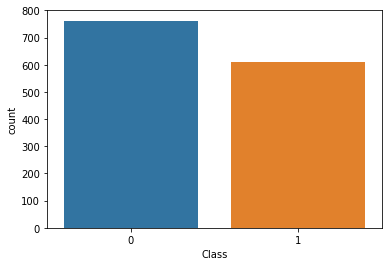

In [4]:
sns.countplot(x='Class', data=data)

C:\Users\Jeet\Anaconda3\envs\virtual_env\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Jeet\Anaconda3\envs\virtual_env\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Jeet\Anaconda3\envs\virtual_env\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


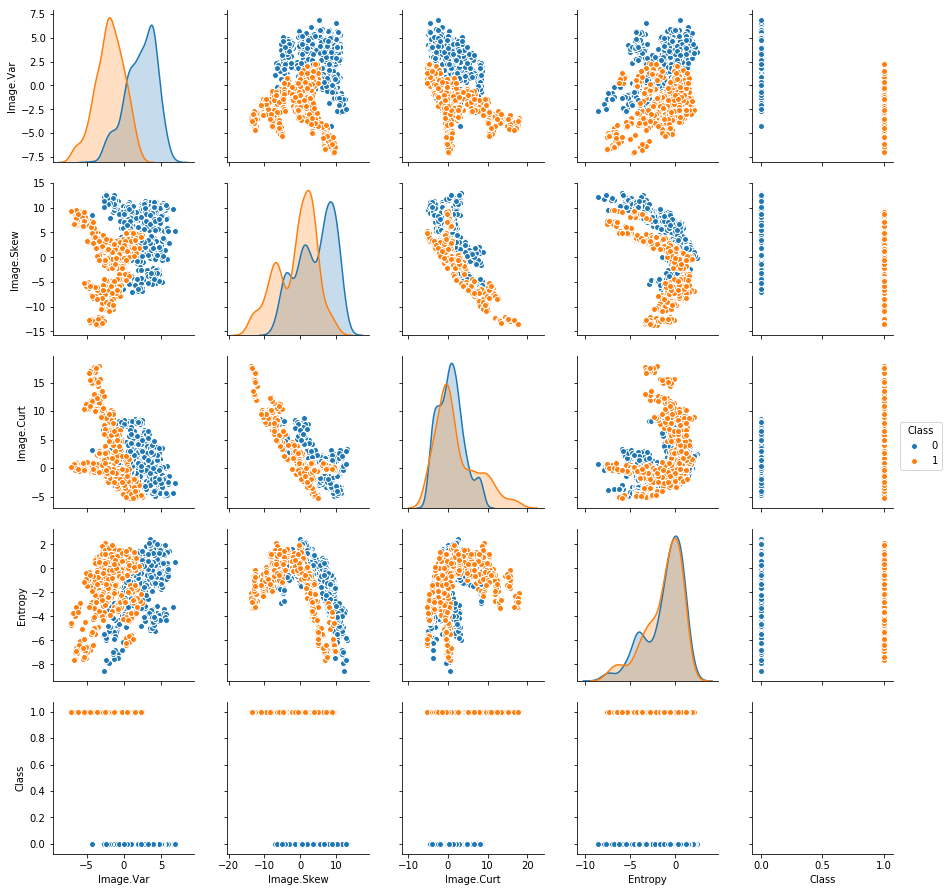

In [5]:
sns.pairplot(data, hue='Class', diag_kind='kde', diag_kws=dict(shade=True))

> The data seems to be linearly separable

In [16]:
# Standardize the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data.drop('Class', axis=1)), columns=data.drop('Class', axis=1).columns)
y = data['Class']

In [17]:
X.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [18]:
# Split the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Building

In [19]:
# Create the feature columns for the model
feat_cols = []
for col in data.drop('Class', axis=1).columns:
    feat_cols.append(tf.feature_column.numeric_column(col))
feat_cols

[NumericColumn(key='Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Image.Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Image.Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [20]:
# Create a classifier for the model
classifier = tf.estimator.DNNClassifier(hidden_units=[10,20,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Jeet\\AppData\\Local\\Temp\\tmphy2p_b71', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000022764FE54A8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [21]:
# Create the input function to be fed to the model in batches
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=20, num_epochs=5, shuffle=True)

In [22]:
# Train the model
classifier.train(input_fn=input_func, steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Jeet\AppData\Local\Temp\tmphy2p_b71\model.ckpt.
INFO:tensorflow:loss = 16.829258, step = 1
INFO:tensorflow:global_step/sec: 423.223
INFO:tensorflow:loss = 0.0363585, step = 101 (0.236 sec)
INFO:tensorflow:global_step/sec: 603.627
INFO:tensorflow:loss = 0.022332951, step = 201 (0.166 sec)
INFO:tensorflow:Saving checkpoints for 240 into C:\Users\Jeet\AppData\Local\Temp\tmphy2p_b71\model.ckpt.
INFO:tensorflow:Loss for final step: 0.018727483.


In [23]:
# Prepare the input function for the Test data
val_func = tf.estimator.inputs.pandas_input_fn(x=X_test, shuffle=False)

In [25]:
# Evaluate the model on the test data
preds = list(classifier.predict(input_fn=val_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\Jeet\AppData\Local\Temp\tmphy2p_b71\model.ckpt-240
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [29]:
final_preds = []
for pred in preds:
    final_preds.append(pred['class_ids'][0])
final_preds[:5]

[0, 0, 0, 0, 0]

In [34]:
print(confusion_matrix(y_test, final_preds))

[[229   0]
 [  0 183]]


In [33]:
print(classification_report(y_test, final_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

   micro avg       1.00      1.00      1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



## Compare the NN model with a Random Forest model

In [36]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

C:\Users\Jeet\Anaconda3\envs\virtual_env\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [37]:
print(confusion_matrix(y_test, preds))

[[229   0]
 [  2 181]]


In [38]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       229
           1       1.00      0.99      0.99       183

   micro avg       1.00      1.00      1.00       412
   macro avg       1.00      0.99      1.00       412
weighted avg       1.00      1.00      1.00       412

